Aditya Narayan Panda
FET/BCE/2021-25/005

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ForNLSVM.csv")

In [3]:
df

,x,y,label
0,2,2,1
1,2,-2,1
2,-2,-2,1
3,-2,2,1
4,1,1,0
5,1,-1,0
6,-1,-1,0
7,-1,1,0


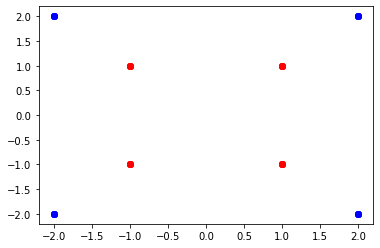

In [4]:
for i in df['label']:
    if i==0:
        plt.scatter(df.loc[df['label']==i,'x'],df.loc[df['label']==i,'y'],c='red')
    else:
        plt.scatter(df.loc[df['label']==i,'x'],df.loc[df['label']==i,'y'],c='blue')

In [5]:
newdf=df

In [6]:
from math import sqrt
for i in range(8):
    if sqrt(newdf.at[i,'x']**2+newdf.at[i,'y']**2)>2:
        a,b=newdf.at[i,'x'],newdf.at[i,'y']
        newdf.at[i,'x']=4-b+abs(a-b)
        newdf.at[i,'y']=4-a+abs(a-b)

In [7]:
newdf

,x,y,label
0,2,2,1
1,10,6,1
2,6,6,1
3,6,10,1
4,1,1,0
5,1,-1,0
6,-1,-1,0
7,-1,1,0


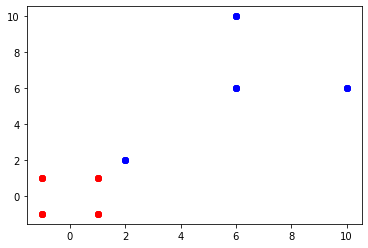

In [8]:
for i in newdf['label']:
    if i==0:
        plt.scatter(newdf.loc[newdf['label']==i,'x'],newdf.loc[newdf['label']==i,'y'],c='red')
    else:
        plt.scatter(newdf.loc[newdf['label']==i,'x'],newdf.loc[newdf['label']==i,'y'],c='blue')

In [9]:
s1=[1,1]
s2=[2,2]

In [10]:
S1=s1
S2=s2
S1.append(1)
S2.append(1)

In [11]:
S1S1=0
S2S1=0
S2S2=0
for i in range(3):
    S1S1+=S1[i]*S1[i]
    S2S1+=S2[i]*S1[i]
    S2S2+=S2[i]*S2[i]
S1S2=S2S1

In [12]:
#Creating linear equations
from sympy import symbols,Eq,solve

a1,a2=symbols('a1,a2')

eq1=Eq((a1*S1S1+a2*S2S1),-1)
print(eq1)

eq2=Eq((a1*S1S2+a2*S2S2),1)
print(eq2)

Eq(3*a1 + 5*a2, -1)
Eq(5*a1 + 9*a2, 1)


In [13]:
val=solve((eq1,eq2),(a1,a2))

In [14]:
val

{a1: -7, a2: 4}

In [15]:
a1S1=[]
a2S2=[]
for i in range(3):
    a1S1.append(val[a1]*S1[i])
    a2S2.append(val[a2]*S2[i])
W=[]
for i in range(3):
    W.append(a1S1[i]+a2S2[i])

In [16]:
W

[1, 1, -3]

In [17]:
w=W[:2]
b=abs(W[2])

In [18]:
w

[1, 1]

In [19]:
b

3

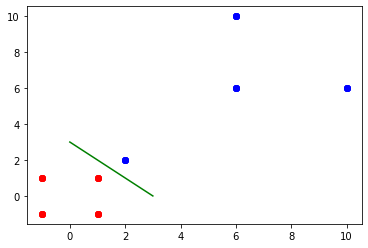

In [20]:
p1=[0,b]
p2=[b,0]
plt.plot(p2,p1,c='green')
for i in newdf['label']:
    if i==0:
        plt.scatter(newdf.loc[newdf['label']==i,'x'],newdf.loc[newdf['label']==i,'y'],c='red')
    else:
        plt.scatter(newdf.loc[newdf['label']==i,'x'],newdf.loc[newdf['label']==i,'y'],c='blue')